In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd/content/drive/My Drive/Movie Recommendation System

/content/drive/.shortcut-targets-by-id/1Wh7IUBKZMN1Yx-I8qZwSWj09hC2VaZfl/Movie Recommendation System


In [ ]:
ratings=pd.read_csv('ratings.csv')
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')

In [ ]:
print(ratings.head())
print(ratings.shape)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)


In [ ]:
print(movies.head())
print(movies.shape)

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]
(9742, 3)


In [ ]:
print(movies.shape)

(9742, 3)


In [ ]:
print(tags.head())
print(tags.shape)

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
(3683, 4)


In [ ]:
print(tags.shape)

(3683, 4)


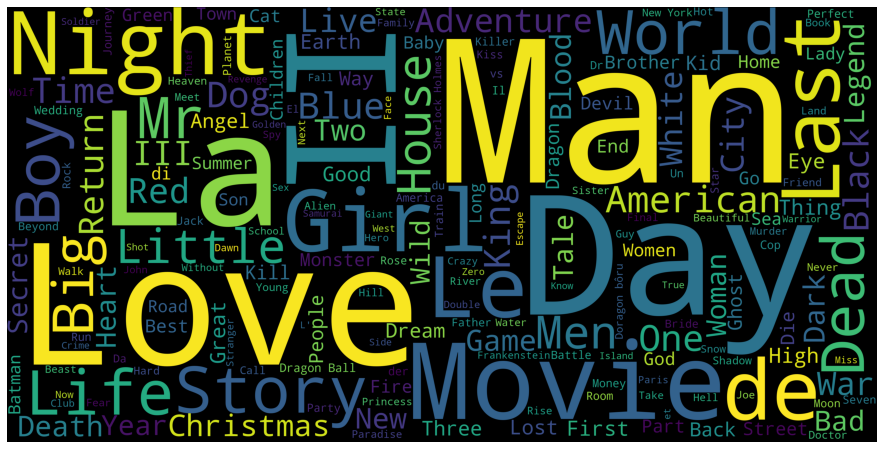

In [ ]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

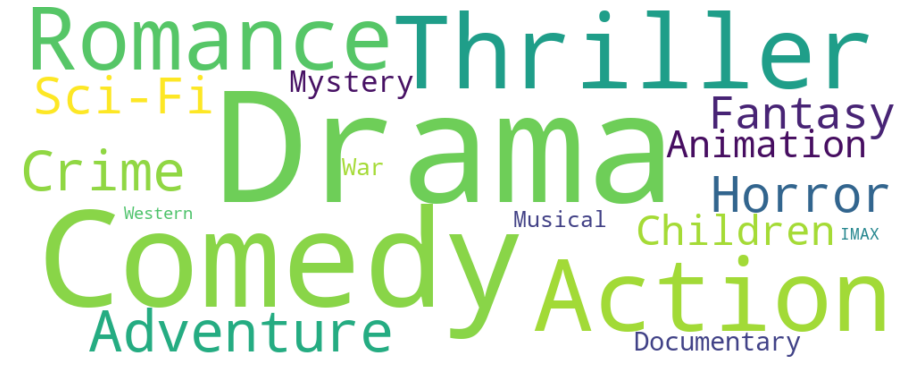

In [ ]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

DATA PREPROCESSING

In [ ]:
movies['genres']=movies['genres'].str.replace('|',' ')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:

len(movies.movieId.unique())

9742

In [ ]:
len(ratings.movieId.unique())

9724

In [ ]:
len(tags.movieId.unique())

1572

In [ ]:
#limit ratings to user ratings that have rated more than 55 movies
#Otherwise it becomes impossible to pivot the rating dataframe later for collaborative filtering

ratings_f=ratings.groupby('userId').filter(lambda x: len(x)>=55)

#list the movie titles that survive the filtering
movie_list_rating =ratings_f.movieId.unique().tolist()

In [ ]:
len(ratings_f.movieId.unique())

9625

In [ ]:
len (ratings_f.movieId.unique())/len (movies.movieId.unique())*100

98.7990145760624

In [ ]:
len (ratings_f.userId.unique())/len (ratings.userId.unique())*100

59.67213114754099

In [ ]:
movies=movies[movies.movieId.isin(movie_list_rating)]

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
Mapping_file=dict(zip(movies.title.tolist(),movies.movieId.tolist()))

In [ ]:
tags.drop(['timestamp'],1,inplace=True)
ratings_f.drop(['timestamp'],1,inplace=True)

In [ ]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [ ]:
ratings_f.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game


In [ ]:
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
                             lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(
                             lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy Romance


In [ ]:
Final.shape

(9625, 5)

CONTENT BASED FILTERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])

In [ ]:
tfidf_matrix.shape

(9625, 1675)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.08801192, 0.01347327, 0.04821012],
       [0.08801192, 1.        , 0.        , 0.        ],
       [0.01347327, 0.        , 1.        , 0.2186134 ],
       [0.04821012, 0.        , 0.2186134 , 1.        ]])

In [ ]:
cosine_sim.shape

(9625, 9625)

In [ ]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [ ]:
genre_recommendations('Toy Story (1995)').head(20)

1757                                 Bug's Life, A (1998)
2355                                   Toy Story 2 (1999)
8695                     Guardians of the Galaxy 2 (2017)
1706                                          Antz (1998)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
8900                                    Inside Out (2015)
1505                           Black Cauldron, The (1985)
2539                We're Back! A Dinosaur's Story (1993)
3230          

MEMORY-BASED COLLABORATIVE FILTERING

In [ ]:
ratings_f['userId'] = ratings_f['userId'].fillna(0)
ratings_f['movieId'] = ratings_f['movieId'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings_f['rating'] = ratings_f['rating'].fillna(ratings_f['rating'].mean())

In [ ]:
# Randomly sample 1% of the ratings dataset
small_data = ratings_f.sample(frac=0.02)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855 entries, 88355 to 98544
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   1855 non-null   int64  
 1   movieId  1855 non-null   int64  
 2   rating   1855 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 58.0 KB
None


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(small_data, test_size=0.3)

In [ ]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = X_train[['userId', 'movieId', 'rating']].values
test_data_matrix = X_test[['userId', 'movieId', 'rating']].values

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(X_train, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:5, :5])

[[1.         0.99809735 0.99775847 0.99999998 0.99783047]
 [0.99809735 1.         0.99998611 0.99810901 0.99999124]
 [0.99775847 0.99998611 1.         0.99777113 0.99999941]
 [0.99999998 0.99810901 0.99777113 1.         0.99784293]
 [0.99783047 0.99999124 0.99999941 0.99784293 1.        ]]


In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.0550535  -0.03378075]
 [-0.0550535   1.         -0.01719677]
 [-0.03378075 -0.01719677  1.        ]]


In [ ]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [ ]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 24302.60912421354
Item-based CF RMSE: 28551.805624700235


In [ ]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 16802.365537123376
Item-based CF RMSE: 2058.900974753146


MODEL BASED COLLABORATIVE FILTERING

In [ ]:
Ratings = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
R=Ratings.values
user_ratings_mean= np.mean(R, axis=1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [ ]:
user_ratings_mean

array([0.10417524, 0.01177499, 0.00976964, 0.07897984, 0.01645413,
       0.11281366, 0.05049362, 0.01727684, 0.01542575, 0.0472028 ,
       0.02488688, 0.01444879, 0.01162073, 0.01676265, 0.04787125,
       0.03753599, 0.04545455, 0.19266763, 0.18850267, 0.08936652,
       0.14854998, 0.03146853, 0.04540313, 0.04128959, 0.01285479,
       0.00699301, 0.04925956, 0.1770362 , 0.03450226, 0.01655697,
       0.02015631, 0.03938708, 0.06077746, 0.03023447, 0.0096668 ,
       0.01624846, 0.00894694, 0.02581242, 0.04113534, 0.03990128,
       0.07260387, 0.16135335, 0.0533731 , 0.01655697, 0.15903949,
       0.01727684, 0.04396339, 0.0136775 , 0.00920403, 0.08864665,
       0.13939737, 0.05985191, 0.01028383, 0.01028383, 0.00730152,
       0.01799671, 0.16608392, 0.04494035, 0.04792267, 0.00843274,
       0.01624846, 0.15364048, 0.10119292, 0.2003805 , 0.01408885,
       0.14263677, 0.01470588, 0.41901481, 0.02067051, 0.02756067,
       0.01295763, 0.01923077, 0.08016248, 0.07774578, 0.02293

In [ ]:
Ratings_demeaned

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

In [ ]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [ ]:
svds?


In [ ]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,-0.474160,0.237581,0.346021,0.053504,-0.108999,1.355739,-0.426912,-0.077438,0.284485,0.417117,0.245054,0.362827,-0.139144,0.255003,0.067873,-0.220421,-0.033781,0.076522,-0.159481,-0.072023,-0.318595,0.774845,1.631756,-0.336022,0.139459,0.739682,-0.014906,0.084650,0.541279,0.134242,...,-0.178088,0.082812,0.039631,0.069620,0.039631,0.033760,0.016202,0.151717,0.036710,-0.172538,-0.155189,-0.121909,0.070459,0.038139,0.052525,0.090319,0.010978,0.012984,-0.018321,0.050599,-0.008879,-0.085795,-0.013370,0.006966,0.016995,0.004960,0.006966,0.004960,0.004960,-0.030425,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,0.077881,0.064805,0.005182,-0.001014,0.045648,0.096822,-0.027822,-0.004426,0.108646,-0.008286,-0.077978,0.016521,0.009482,0.023615,-0.212386,0.040676,-0.001671,-0.021906,-0.174248,0.013497,0.031743,-0.202221,-0.163632,0.030075,0.000392,-0.033238,0.000224,0.017713,0.009105,0.033852,...,0.107281,-0.026524,0.027091,0.011932,0.027091,0.016864,0.051425,0.069516,0.057564,-0.006654,-0.005944,0.014142,-0.002021,0.038409,0.035970,-0.002728,0.002845,0.003324,0.019168,-0.001314,-0.001049,-0.003101,0.009848,0.001888,0.004281,0.001410,0.001888,0.001410,0.001410,0.024940,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,-0.005484,0.031175,0.019045,-0.008570,0.009015,0.029135,-0.021266,0.017135,-0.058321,-0.012562,-0.076699,0.011520,-0.014717,0.041779,-0.040655,-0.004429,-0.009282,-0.009510,0.071715,0.010940,0.023559,0.023674,-0.001701,0.006543,0.006831,0.067326,0.007865,-0.001794,0.011360,0.001821,...,0.010848,-0.005258,0.012808,0.017701,0.012808,0.012132,0.009292,0.002576,0.012102,-0.001268,-0.000341,0.020286,0.014689,0.004859,0.014408,0.016599,0.008085,0.008100,0.003702,0.012780,0.007564,0.003369,0.005910,0.008053,0.008131,0.008038,0.008053,0.008038,0.008038,0.005310,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,0.637032,-0.092990,0.280611,0.268450,-0.027183,0.161275,1.801845,-0.258694,-0.035952,0.131731,1.912042,-0.169062,-0.034940,0.063111,1.661501,0.158679,0.026145,0.551609,0.492758,0.256954,-0.220697,2.094105,1.940568,0.880095,-0.077526,1.327586,0.003094,0.087768,0.102798,0.069933,...,-0.288689,0.111226,0.004181,0.059797,0.004181,0.006699,-0.011445,0.190691,-0.072316,0.121225,0.109122,-0.003448,-0.019439,0.049429,0.005512,-0.025047,-0.002677,-0.003250,0.010189,-0.013831,0.002714,0.060707,-0.022289,-0.001531,-0.004396,-0.000958,-0.001531,-0.000958,-0.000958,0.006164,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,0.974908,-0.070313,0.135688,0.237220,0.208138,0.552464,0.771266,-0.049298,0.326467,0.082279,1.158006,0.332666,0.156395,0.109681,0.861100,0.242800,0.033883,0.124262,0.044031,-0.000574,0.465793,1.254308,1.893785,0.999793,-0.017239,1.256341,-0.011412,0.111539,-0.012218,0.110956,...,-0.007826,0.023460,-0.006995,-0.012447,-0.006995,-0.004094,-0.009139,0.025778,0.004529,-0.017096,-0.015755,-0.002459,-0.006417,-0.003125,-0.008097,-0.007197,0.003527,0.004970,-0.009438,-0.005636,-0.003344,-0.010391,-

In [ ]:

def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [ ]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
already_rated, predictions = recommend_movies(preds, 5, movies, ratings, 5)

User 5 has already rated 44 movies.
Recommending highest 5 predicted ratings movies not already rated.


In [ ]:

# Top 20 movies that User 5 has rated 
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
37,5,590,5.0,847434747,Dances with Wolves (1990),Adventure Drama Western
30,5,475,5.0,847435311,In the Name of the Father (1993),Drama
32,5,527,5.0,847434960,Schindler's List (1993),Drama War
6,5,58,5.0,847435238,"Postman, The (Postino, Il) (1994)",Comedy Drama Romance
41,5,596,5.0,847435292,Pinocchio (1940),Animation Children Fantasy Musical
40,5,595,5.0,847434832,Beauty and the Beast (1991),Animation Children Fantasy Musical Romance IMAX
11,5,247,5.0,847435337,Heavenly Creatures (1994),Crime Drama
39,5,594,5.0,847435238,Snow White and the Seven Dwarfs (1937),Animation Children Drama Fantasy Musical
17,5,296,5.0,847434748,Pulp Fiction (1994),Comedy Crime Drama Thriller
16,5,290,5.0,847435311,Once Were Warriors (1994),Crime Drama


In [ ]:
# Top 5 movies that User 5 hopefully will enjoy
predictions

,movieId,title,genres
288,356,Forrest Gump (1994),Comedy Drama Romance War
468,593,"Silence of the Lambs, The (1991)",Crime Horror Thriller
384,480,Jurassic Park (1993),Action Adventure Sci-Fi Thriller
121,161,Crimson Tide (1995),Drama Thriller War
305,377,Speed (1994),Action Romance Thriller


MODEL EVALUATION

In [ ]:
!pip install surprise


     |████████████████████████████████| 11.8MB 255kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670972 sha256=87ef76b5c4bf7df70c40dad3dd4eb72937b5c2135c9b0e4532c6f013cc64fb20
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
# Import libraries from Surprise package
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import SVD
# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [ ]:
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE'])

{'fit_time': (4.51360011100769,
  4.470064640045166,
  4.476624250411987,
  4.451500177383423,
  4.517265319824219),
 'test_rmse': array([0.8646863 , 0.87857759, 0.87694916, 0.86862668, 0.87553678]),
 'test_time': (0.14348816871643066,
  0.2385087013244629,
  0.14977097511291504,
  0.22945046424865723,
  0.14820432662963867)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 2]

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [ ]:
svd.predict(2,1994)

Prediction(uid=2, iid=1994, r_ui=None, est=3.7050509295233933, details={'was_impossible': False})

MOVIE REVIEW SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd/content/drive/My Drive/Movie Recommendation System

/content/drive/My Drive/Movie Recommendation System


In [ ]:
data = pd.read_csv('/content/drive/My Drive/movie rating prediction/Train 4.csv')
print(data.shape)
x = data['review']
y = data['label']

(40000, 2)


In [ ]:
print(data.shape)
data.head()

(40000, 2)


,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [ ]:
data.shape


(40000, 2)

In [ ]:
x[0]

"mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it"

In [ ]:
test = pd.read_csv('/content/drive/My Drive/movie rating prediction/Test (3)/Test.csv')
x_test = test['review']
x_test.shape

(10000,)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import sys



tokenizer = RegexpTokenizer(r'\w+')
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()




def getCleanReview(reviews):
    review = reviews.lower()
    review = review.replace("<br/><br/>"," ")
    
    tokens = tokenizer.tokenize(review)
    new_tokens = [token for token in tokens if token not in en_stopwords]
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    cleaned_review = ' '.join(stemmed_tokens)
    
    return cleaned_review

In [ ]:
x_clean = [getCleanReview(i) for i in x[0:2000]] #ListComprehension

In [ ]:
xt_clean = [getCleanReview(i) for i in x[2000:4000]]

In [ ]:
x_clean[0:5]

['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
 'http video googl com videoplay docid 211772166650071408 hl en distribut tri br br opt mass appeal br br want best possibl view rang forgo profit continu manual labor job gladli entertain work br br view texa tale pleas write like like alex like stuie texa texa tale write br br opinion rule',
 'titl opera 1987 director dario argento cast cristina masillach ian charleson urbano barberini daria nicolodi review argento movi seen suspiria one blew away style color spooki stori line next decid go opera told one best man think discov ultim one favorit horror director br br opera young opera singer get big break main star creepi modern opera take mc beth get hit car betti understudi get part bad psycho make watch brutal murder friend co worker br br wow id heard good thing flick prepar level great film would take yeah movi shortcom ill get

In [ ]:
from sklearn .feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_vec = cv.fit_transform(x_clean).toarray()
print(x_vec,x_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (2000, 17760)


In [ ]:
print(cv.get_feature_names())

['00', '000', '001', '007', '01', '02', '039', '04', '06', '08', '10', '100', '1000', '10000', '10000th', '1001', '100yard', '101', '101st', '102', '103', '104', '1040', '1040a', '106', '1080p', '10ft', '10th', '11', '1100', '112', '116', '117', '118', '11th', '12', '120', '1201', '1202', '122', '125', '12a', '12th', '12â', '13', '131', '13itch', '13k', '13th', '14', '146', '149', '14iem', '14th', '15', '150', '1500', '150k', '158', '15th', '16', '1602', '162', '167', '168', '16mm', '16th', '17', '1790', '1798', '17th', '18', '180', '1800', '1837', '1850', '1853', '1860', '1871', '1890', '1895', '1899', '18th', '19', '1900', '1901', '1904', '1906', '1909', '1912', '1915', '1916', '1919', '1920', '1922', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1947â', '1948', '1949', '1950', '1951', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1962', '1963'

In [ ]:
xt_vec = cv.transform(xt_clean).toarray()
print(xt_vec)
cv.get_feature_names()
print(xt_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2000, 17760)


In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [ ]:
mnb= MultinomialNB()
print(mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
mnb.fit(x_vec,y[0:2000])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.predict(xt_vec)

array(['pos', 'neg', 'pos', ..., 'pos', 'neg', 'neg'], dtype='<U3')

In [ ]:
ans = mnb.predict_proba(xt_vec)

In [ ]:
bnb = BernoulliNB(binarize = 0.0)

In [ ]:
print(bnb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [ ]:
bnb.fit(x_vec,y[0:2000])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
bnb.predict_proba(xt_vec)

array([[7.79717632e-04, 9.99220282e-01],
       [9.95494554e-01, 4.50544616e-03],
       [5.86823240e-03, 9.94131768e-01],
       ...,
       [2.61894554e-03, 9.97381054e-01],
       [9.99998661e-01, 1.33911457e-06],
       [9.99278534e-01, 7.21465763e-04]])

In [ ]:
bnb.score(xt_vec,y[2000:4000])

0.817

In [ ]:
mnb.score(xt_vec,y[2000:4000])

0.826

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_vec,y[0:2000])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb.predict_proba(xt_vec)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
gnb.score(xt_vec,y[2000:4000])

0.6495

In [ ]:
print("BERNAULLI NAIVE BAYES SCORE = ", bnb.score(xt_vec,y[2000:4000]))
print("MULTINOMIAL NAIVE BAYES SCORE = ", mnb.score(xt_vec,y[2000:4000]))
print("GAUSSIAN NAIVE BAYES SCORE = ", gnb.score(xt_vec,y[2000:4000]))

BERNAULLI NAIVE BAYES SCORE =  0.817
MULTINOMIAL NAIVE BAYES SCORE =  0.826
GAUSSIAN NAIVE BAYES SCORE =  0.6495
